## **Exercise 1.1 — Plotting**
<br>
Plot the current-voltage characteristic (more commonly referred to as $I(U)$ characteristic) of a photovoltaic device for various radiation intensities $G$ in a single graph. 
<br>
The $I(U)$ behaviour of the photovoltaic device is modelled using the equation: 
$$\begin{equation}
    I=I_{ph}-I_0*(e^{\frac{qU}{nkT}}-1)
    \end{equation} $$ 
Use a loop to repeat the calculations for different $G$ = 200 | 400| 600 | 800 | 1000 ($W/m^2$). The photocurrent $I_{ph}$ shall be proportional to the irradiation intensity $G$ according to: $I_{ph} = G * 0.2$ $Am^2/W$.
<br>
As for the remaining parameters use: $kq=8.617*10^{-5}$ $V/K$, alternatively: $k=8.617*10^{−5}$ $eV/K$, 
<br>
$n=1.1$, 
<br>
$T=300$ $K$, 
<br>
$I_0 = I_{00}T^3*e^{\frac{-Eg}{kT}}$, with the energy bandgap of silicon $E_g=1.114$ $eV$ and the constant $I_{00} = 17.9$ $mA/K^3$.
<br>
Adjust the axes of the graph such that only those parts of the lines in the 1st quadrant are nicely shown.

### Steps to solution

1. Import numpy library

In [1]:
import numpy as np

2. Using `numpy`, define a `G` array, with one row and five columns holding the values stated above.

In [2]:
# %matplotlib widget

In [3]:
G = np.array([200,400,600,800,1000])

In [4]:
G.shape

(5,)

3. Define a `V` variable, using the `linspace` function. `V` shall have a range from 0 to 1.2, with atleast 100 values in between.

In [5]:
V = np.linspace(0,1.2,100)

In [6]:
V.shape

(100,)

4. Define an `I` variable (with zero values), with rows=`len(G)` and cloumns=`len(V)`.

In [7]:
I = np.zeros(shape=(len(G),len(V)))

In [8]:
I.shape

(5, 100)

5. Define the following variables using the above given information and units in the square brackets:
    - `I_ph` [$A$]
    - `k` [$eV/K$] (in this case you can define `q` = 1)
    - `q`
    - `n`
    - `T` [$K$]
    - `E_g` [$eV$]
    - `I_00` [$A/K^3$]
    - `I_0` [$A$]

In [9]:
I_ph = G*0.2
k = 8.617*(10**(-5))
q = 1
n = 1.1
T = 300
E_g = 1.114
I_00 = 17.9*(10**(-3))
I_0 = I_00*(T**3)*np.exp((-E_g)/(k*T))

In [10]:
I_ph.shape

(5,)

6. Create a nested `for` loop to calculate the values of elements in `I`. For every row in `I` calculate the value for every column in `I`.
```python
for every row in I:
    for every column in I:
        calculate I
```

In [11]:
for i in range(len(G)):
    for j in range(len(V)):
        I[i,j] = I_ph[i] - I_0*(np.exp(q*V[j]/(n*k*T))-1)

7. Plot the $I(U)$ curves:
    - import matplotlib.pyplot
    - use the `plt.subplots()` function to initialize a figure. Use the `figsize` option to choose a proper figure size.
    - create a `for` loop to plot a curve for each level of radiation in `G`
    - use `ax.plot` function for plotting, and define a label for each curve to be plotted
    - use `ax.set` function to set the axes labels, figure title and axes limits (use a ylim = [0,220])
    - add a grid and legend to your figure

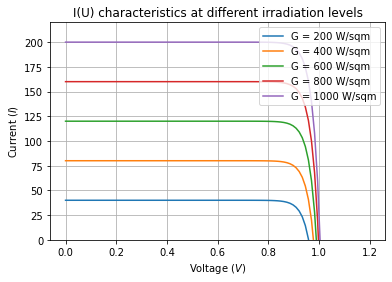

In [12]:
import matplotlib.pyplot as plt

for k in range(len(G)):
    plt.plot(V, I[k,:], label = "G = " + str(G[k]) + " W/sqm")
plt.ylim([0,220])
plt.legend()
plt.title("I(U) characteristics at different irradiation levels")
plt.xlabel("Voltage ($V$)")
plt.ylabel("Current ($I$)")
plt.grid()

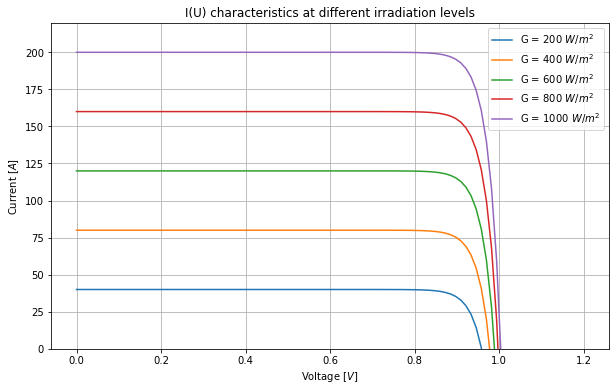

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
for k in range(len(G)):
    ax.plot(V,I[k,:], label = "G = " + str(G[k]) + " $W/m^2$")
ax.set(xlabel = "Voltage [$V$]", ylabel = 'Current [$A$]', ylim = [0,220], title = 'I(U) characteristics at different irradiation levels')
ax.grid()
ax.legend()
plt.show()

## Exercise 1.2 - Functions

Write a function `IUanalyzer` which takes an I(U) characteristic of a solar cell as argument and returns a vector of the following characteristic parameters: 
- maximum Power: $P_{mpp}$ (remember that Power = Voltage x Current and that there exists a function in Python to find the maximum in an array) 
- Voltage at maximum power point: $U_{mpp}$ 
- Current at maximum power point: $I_{mpp}$ 
- Efficiency ($\eta$) $= \frac {P_{mpp}}{G}$ 
- Short circuit current $I_{sc} = I(0)$ (equal to the photocurrent) 
- Open circuit voltage: $U_{oc}$ (remember: $I(U_{oc}) = 0$) 
- Fill factor ($FF$) $= \frac{P_{mpp}}{I_{sc} \cdot U_{oc}}$ 

By modifying your code from Exercise 1.1, loop through various temperatures: 20, 30, 40, 50, 60 °C and keep the illumination constant at 1000 $W/m^2$. During each loop iteration call `IUanalyzer`. Use this to plot $U_{oc}(T)$, $I_{sc}(T)$ and $\eta(T)$ in separate figures.

### Steps to solution

1. import necessary libraries: `numpy` and `matplotlib.pylpot`

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt

2. Create the function `IUanalyzer`
    - use the `def` command to create the function. Use `I` and `V` as the function input arguments.
    - assign a value of 1000 to the `G` variable.
    - create variable array `P` with value equal to the element-wise multiplication of arrays `I` and `V`.
    - assign the maximum value of `P` to `P_mpp`
    - find the location of the maximum value of `P` and assign it to variable maximum power point:`mpp` (<font color=red> Hint: use `np.argmax()` function </font>)
    - assign the element in `V` at index `mpp` to a variable `V_mpp` 
    - assign the element in `I` at index `mpp` to a variable `I_mpp` 
    - calculate the efficiency value and assign it to `eta`
    - assign the element in `I` for the same index where `V` is equal to 0 to `I_sc` 
        1. follow same logic used to find `V_mpp` and `I_mpp`
        2. you can use `np.where()` function
        3. make sure to make `I_sc` an integer
    - assign the element in `V` for the same index where `I` is **closest to 0** to `V_oc`
        1. follow same logic used to find `I_sc`
        2. you can use `np.argmin()` and `np.abs()` functions
    - calculate the fill factor value and assign it to `FF`
    - create a list `PV` with the values of `P_mpp`, `V_mpp`, `I_mpp`, `eta`, `V_oc` and `FF`
        - in order to create a list `P` with values `h` and `r` you insert: `P = [h, r]`. Indexing is same as in a `np.array`: `P[0]` equals to `h`

In [15]:
def IUanalyzer(I, V):
    G = 1000
    P = V*I
    P_mpp = np.max(P)
    mpp = np.argmax(P)
    V_mpp = V[mpp]
    I_mpp = I[mpp]
    eta = P_mpp/G
    I_sc = int(I[np.where(V==0)[0]])
    V_oc = V[np.argmin(np.abs(I))]
    FF = P_mpp/(I_sc*V_oc)
    PV = [P_mpp, V_mpp, I_mpp, eta, I_sc, V_oc, FF]
    return PV

3. Using numpy, define a `T` array, with one row and five columns holding the values stated above [unit: $K$].

In [16]:
T = np.array([20, 30, 40, 50, 60]) + 273

4. Define a `V` variable, using the `linspace` function. `V` shall have a range from 0 to 1.2, with atleast 1000 values in between (the more the values the more the accuracy of your `V_oc` results).

In [17]:
V = np.linspace(0,1.2,1000)

In [18]:
V.shape

(1000,)

5. Define an `I` variable (with zero values), with rows=`len(T)` and cloumns=`len(V)`.

In [19]:
I = np.zeros(shape=(len(T),len(V)))

In [20]:
print(I.shape)

(5, 1000)


6. Define the following variables using the above given information and units in the square brackets:
    - `G` [$W/m^2$]
    - `I_ph` [$A$]
    - `k` [$eV/K$] (in this case you can define `q` = 1)
    - `q`
    - `n`
    - `E_g` [$eV$]
    - `I_00` [$A/K^3$]

In [21]:
G = 1000
I_ph = G*0.2
k = 8.617*(10**(-5))
q = 1
n = 1.1
E_g = 1.114
I_00 = 17.9*(10**(-3))

7. Create variables `V_oc`, `I_sc` and `eta` with same shape as that of `T`

In [22]:
V_oc = np.zeros(shape = len(T))
I_sc = np.zeros(shape = len(T))
eta = np.zeros(shape = len(T))

8. Create a `for` loop to go through the values of `T`
    - calculate the value of `I_0` at different values of `T`
    - create another `for` loop to go through the values of `V`
        - calculate the value of `I`
    - call the function `IUanalyzer` with the calculated `I` and `V` as input arguments
    - assign function return values in `PV` to their respective elements in variable arrays `V_oc`, `I_sc` and `eta`

In [26]:
for j in range(len(T)):
    I_0 = I_00*(T[j]**3)*np.exp(-E_g/(k*T[j]))
    for i in range(len(V)):
        I[j,i] = I_ph - I_0*(np.exp(V[i]/(n*k*T[j])) - 1)
    PV = IUanalyzer(I[j,:],V)
    eta[j] = PV[3] 
    I_sc[j] = PV[4]
    V_oc[j] = PV[5]

9. Repeat the same steps used in Exercise 1.1 to plot the $I(U)$ characteristics at different radiation levels. Apply the necessary changes to plot the characteristics for different temperature levels instead that of radiation.

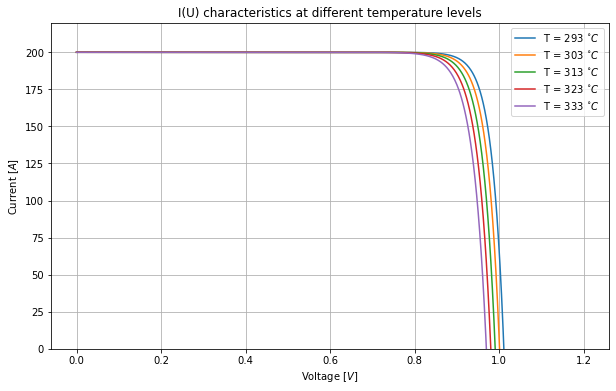

In [28]:
fig, ax = plt.subplots(figsize=(10,6))
for j in range(len(T)):
    ax.plot(V,I[j,:], label = "T = " + str(T[j]) + " $^{\circ}C$")
ax.set(xlabel = "Voltage [$V$]", ylabel = 'Current [$A$]', ylim = [0,220], title = 'I(U) characteristics at different temperature levels')
ax.grid()
ax.legend()
plt.show()

10. Plot `eta` vs `T`, `I_sc` vs `T` and `V_oc` vs `T` in separate figures (cells). Make sure to include axes-labels and title for each plot.

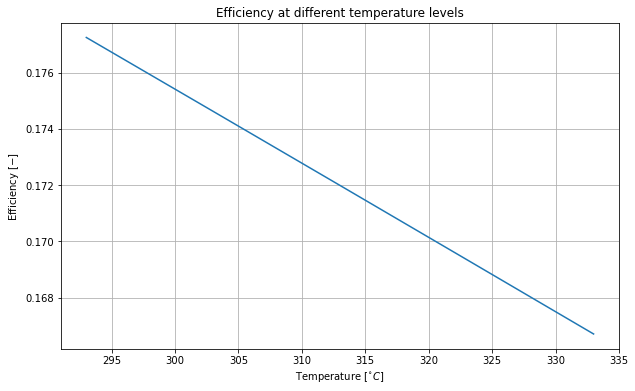

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(T, eta)
ax.set(xlabel = "Temperature [$^{\circ}C$]", ylabel = 'Efficiency [$-$]', title = 'Efficiency at different temperature levels')
ax.grid()
plt.show()

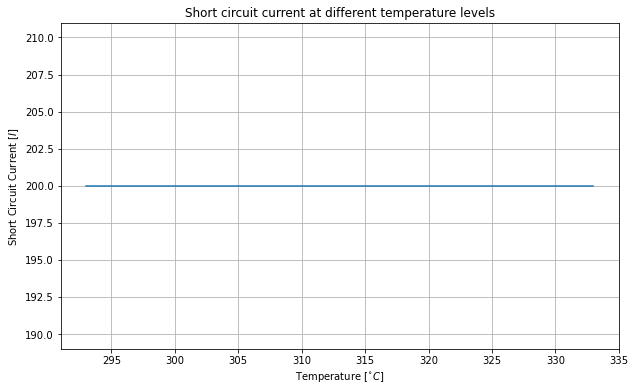

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(T, I_sc)
ax.set(xlabel = "Temperature [$^{\circ}C$]", ylabel = 'Short Circuit Current [$I$]', title = 'Short circuit current at different temperature levels')
ax.grid()
plt.show()

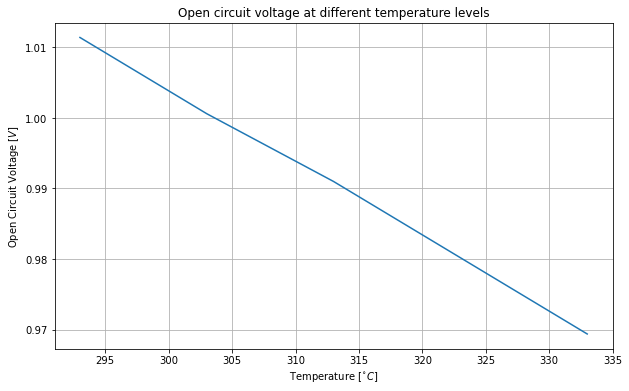

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(T, V_oc)
ax.set(xlabel = "Temperature [$^{\circ}C$]", ylabel = 'Open Circuit Voltage [$V$]', title = 'Open circuit voltage at different temperature levels')
ax.grid()
plt.show()